## Building Neural networks from scratch


### importing dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import dictionary_to_vector, vector_to_dictionary

### building a toy dataset

In [2]:
X = np.random.randn(2,50)
y = X[0,:] * 8 + X[1,:] * 5 + 3
X, y

(array([[-3.46516822e-01,  3.28366315e-01,  2.75543546e+00,
         -1.39573010e+00, -1.45709752e+00,  8.53064417e-01,
          1.76859449e-02,  2.56435372e-01, -8.81178349e-01,
         -7.46367222e-01,  6.85604381e-01,  2.26186559e+00,
         -1.92533204e+00, -1.29951202e+00,  5.16378815e-01,
          1.28091829e+00, -2.51229977e-01, -3.29927693e-01,
         -3.56851480e-01,  1.92169382e-01,  1.36035205e-01,
          2.02845862e+00, -8.62854233e-02,  1.03102478e+00,
          5.86276712e-01, -1.13082317e+00, -7.68238981e-01,
         -7.19713471e-01, -3.31966003e-02,  2.35350627e+00,
          2.86849467e-01,  1.46868576e-01, -3.09808803e-01,
         -1.53749813e+00, -2.47206020e-01, -8.43631643e-01,
         -3.14447445e-01,  3.76324371e-02,  8.37949812e-02,
         -7.26366784e-01, -3.17203296e-01,  2.32037010e-01,
         -1.52704391e-02, -4.98867069e-01,  6.21855046e-01,
          5.03516418e-02,  2.75885728e-01,  4.14248263e-01,
         -4.10227005e-01, -5.87034224e-0

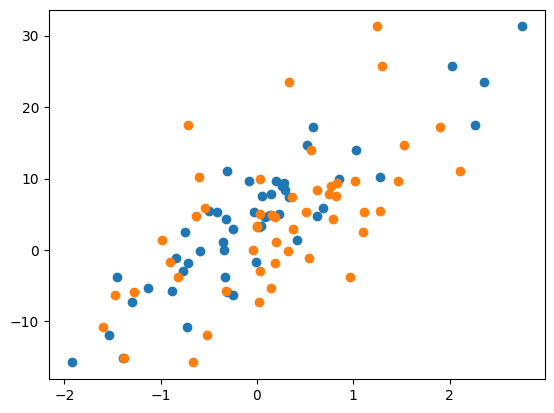

In [3]:
plt.scatter(x=X[0,:],y=y)
plt.scatter(x=X[1,:],y=y)

### Building neural network with one hidden layer

In [4]:
def initialize_parameters(n_in, n_h, n_out):
    """
    initializes model parameters.

    Arguments:
    n_in: number of input units
    n_h: number of hidden units
    n_out: number of output units

    Return:
    parameters: dictionary of all the randomly intialized parameters
    
    """

    np.random.seed(42)

    W1 = np.random.rand(n_h, n_in)
    b1 = np.random.rand(n_h, 1)
    W2 = np.random.rand(n_out, n_h)
    b2 = np.random.rand(n_out, 1)

    parameters = {"W1":W1,
                  "b1":b1,
                  "W2":W2,
                  "b2":b2}
    
    return parameters

In [5]:
def forward_propagation(X, parameters):
    """
    Arguments:
    X: input data of shape (n_x, m)
    parameters: randomly initialized model parameters

    Return:
    A2 = sigmoid output of second activation
    cache = dictionary of Z1, A1, Z2 and A2
    """
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    # Forward pass
    Z1 = W1 @ X
    A1 = np.tanh(Z1)
    Z2 = W2 @ A1
    A2 = Z2

    cache = {"Z1":Z1,
             "A1":A1,
             "Z2":Z2,
             "A2":A2}

    return A2, cache

In [6]:
def compute_loss(A2, Y):
    """
    compute Mean Squared Error loss of the model
    Arguments:
    A2: Prediction of the model
    Y: "true" label vactor of shape (1, number of samples)

    Return:
    loss: computed scalar loss of the model
    """

    m = len(Y)
    loss = 1/m * np.sum((A2 - Y) ** 2)
    return loss

In [7]:
def backward_propagation(parameters, cache, X, Y):
    """ computes gradient of the model parameters
    
    Arguments:
    parameters: dictionary of the parameters of the model
    cache: a dictionary containing Z1, A1, Z2 and A2
    X: input data of shape (2, number of example)
    Y: "true" label vector of shape (1, number of example)
    
    Return:
    grad: dictionary of the gradients of each model parameters
    """

    m = len(Y)
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    Z1 = cache["Z1"]
    A1 = cache["A1"]
    Z2 = cache["Z2"]
    A2 = cache["A2"]

    # Backpropagation
    dA2 = (2/m) * (A2 - Y) # (1, m)
    dZ2 = dA2 # (1,m)
    dW2 = dZ2 @ A1.T #(1, n_h)
    db2 = np.sum(dZ2, axis=1, keepdims=True) # (1,1)
    dA1 = W2.T @ dZ2 # (n_h, m)
    dZ1 = dA1 * (1 - np.power(A1,2)) # (n_h, m)
    dW1 = dZ1 @ X.T # (n_h, n_in)
    db1 = np.sum(dZ1, axis=1, keepdims=True) # (1, n_h)

    grads = {"dW1":dW1,
            "db1":db1,
            "dW2":dW2,
            "db2":db2}

    return grads

In [8]:
parameters = initialize_parameters(2, 4, 1)
parameters

{'W1': array([[0.37454012, 0.95071431],
        [0.73199394, 0.59865848],
        [0.15601864, 0.15599452],
        [0.05808361, 0.86617615]]),
 'b1': array([[0.60111501],
        [0.70807258],
        [0.02058449],
        [0.96990985]]),
 'W2': array([[0.83244264, 0.21233911, 0.18182497, 0.18340451]]),
 'b2': array([[0.30424224]])}

In [9]:
A2, cache = forward_propagation(X, parameters)
A2

array([[-0.2173051 ,  0.53240239,  1.27926659, -1.22407057,  0.30392064,
         0.43699092,  0.01284564,  0.82318893, -0.70788384,  0.7063792 ,
        -0.23622638,  0.274148  , -1.10941557, -0.56084793,  1.17103475,
        -0.02225433, -1.12484684, -0.87542834,  0.04070485,  0.94720094,
         0.24366074,  1.25125136,  1.06708186,  0.90742795,  1.2364374 ,
        -0.37900476, -0.33812597, -0.15739286,  0.51649744,  1.04247903,
         0.72985273,  0.77151323, -1.07629931, -0.99192357,  0.2764421 ,
         0.16053962,  1.18299723,  0.02017456,  0.24461689, -1.20560071,
         0.63465102,  0.15517446, -0.83458975,  0.89291546, -0.36300972,
         0.78988453,  0.87031895, -0.74401631,  0.82620379,  0.05555073]])

In [10]:
loss = compute_loss(A2, y)
loss

94.59291734864503

In [11]:
grads = backward_propagation(parameters=parameters, cache=cache, X=X, Y=y)
grads

{'dW1': array([[-4.74435491, -1.22221401],
        [-0.69180527, -0.60940163],
        [-2.39394493, -1.65735601],
        [-1.62857506, -0.61995451]]),
 'db1': array([[-3.26705248],
        [-0.88332036],
        [-1.2961011 ],
        [-0.82601029]]),
 'dW2': array([[ -9.51210309, -10.39017973,  -3.86881036,  -7.04472041]]),
 'db2': array([[-7.86125133]])}

In [12]:

def check_grads(parameters=parameters, grads=grads):
    """
    check the calculated gradients are correct
    """
    eps = 0.00000001
    params_theta = {}

    
    # convert parameter dictionary to a single vector
    param_vector = dictionary_to_vector(parameters=parameters)
    print(param_vector)

    for i in range(len(param_vector)):
        theta_minus = param_vector[i] - eps
        theta_plus = param_vector[i] + eps

        ## convert theta_minus and theta_plus vector to dictionary
        dict_theta_minus = vector_to_dictionary(vector=theta_minus, parameters=parameters)
        dict_theta_plus = vector_to_dictionary(vector=theta_plus, parameters=parameters)

        ## TODO: forward pass and calculate loss

        ## TODO: calculate gradient manually
    
        ## TODO: check correctness of the backpropagation
    print(param_dictionary)

check_grads(parameters = parameters, grads=grads)

[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452
 0.05808361 0.86617615 0.60111501 0.70807258 0.02058449 0.96990985
 0.83244264 0.21233911 0.18182497 0.18340451 0.30424224]
{'W1': array([[0.37454012, 0.95071431],
       [0.73199394, 0.59865848],
       [0.15601864, 0.15599452],
       [0.05808361, 0.86617615]]), 'b1': array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848]]), 'W2': array([[0.37454012, 0.95071431, 0.73199394, 0.59865848]]), 'b2': array([[0.37454012]])}


In [16]:
## manual gradient check
## lets check the gradient calculation of W1[0][0]
## making a copy of parameters
import copy

check_params = copy.deepcopy(parameters)

## nudging the W[0][0] parameter by 0.00000001
check_params["W1"][0][0] = check_params["W1"][0][0] + 0.00000001

## forward pass and loss
check_A2, check_cache = forward_propagation(parameters=check_params, X=X)
check_loss = compute_loss(A2=check_A2, Y=y)

# manually computing gradient of parameter W[0][0]
gradient = (check_loss - loss)/ 0.00000001

print(f"Numerically approximated gradient of the parameter W[0][0] is:{gradient}")
print(f"Gradient of W[0][0] calculated by backprop: {grads['dW1'][0][0]}")
print(gradient - grads['dW1'][0][0])

Numerically approximated gradient of the parameter W[0][0] is:-4.744353532259993
Gradient of W[0][0] calculated by backprop: -4.744354905210456
1.3729504635406897e-06


In [14]:
parameters

{'W1': array([[0.37454012, 0.95071431],
        [0.73199394, 0.59865848],
        [0.15601864, 0.15599452],
        [0.05808361, 0.86617615]]),
 'b1': array([[0.60111501],
        [0.70807258],
        [0.02058449],
        [0.96990985]]),
 'W2': array([[0.83244264, 0.21233911, 0.18182497, 0.18340451]]),
 'b2': array([[0.30424224]])}

In [15]:
loss, check_loss

(94.59291734864503, 94.5929173012015)